In [14]:
#Carga los datos como un DataFrame fusionando los ficheros en uno solo

In [15]:
import pandas as panda
import numpy as num
import matplotlib.pyplot as plot

In [16]:
stamp = panda.read_csv("BITSTAMP.csv", sep = ";", decimal=",", parse_dates=["Date"], header=0, names=["Date", "Value_bitstamp"])
coin = panda.read_csv("COINBASE.csv", sep = ";", decimal=",", parse_dates=["Date"], header=0, names=["Date", "Value_bicoin"])
bit = panda.read_csv("ITBIT.csv", sep = ";", decimal=",", parse_dates=["Date"], header=0, names=["Date", "Value_itbit"])

In [17]:
print stamp
print coin
print bit

          Date  Value_bitstamp
0   2016-07-19        674.1899
1   2016-07-18        673.9901
2   2016-07-17        680.6801
3   2016-07-16        661.7701
4   2016-07-15        667.7401
5   2016-07-14        660.5701
6   2016-07-13        661.0201
7   2016-12-07        668.5801
8   2016-11-07        647.6901
9   2016-10-07        647.7601
10  2016-09-07        640.0101
11  2016-08-07        658.6101
12  2016-07-07        619.0901
13  2016-06-07        675.2601
14  2016-05-07        669.5801
15  2016-04-07        674.7601
16  2016-03-07        660.0001
17  2016-02-07        695.2101
18  2016-01-07        675.5501
19  2016-06-30        660.6201
20  2016-06-29        633.8101
21  2016-06-28        647.0001
22  2016-06-27        643.9201
23  2016-06-26        629.9700
24  2016-06-25        653.0201
25  2016-06-24        652.1301
26  2016-06-23        612.0401
27  2016-06-22        610.9001
28  2016-06-21        647.0001
29  2016-06-20        738.4901
..         ...             ...
337 2015

In [18]:
#Carga los datos como un DataFrame fusionando los ficheros en uno solo.

In [19]:
bittwo=panda.merge(stamp, coin, on="Date", how="inner")

In [20]:
bitall=panda.merge(bittwo, bit, on="Date", how="inner")

In [21]:
#Utiliza como índice la fecha de cotización

In [22]:
bitall=bitall.set_index("Date")

In [23]:
bitall.sort_index(inplace=True)

In [24]:
print bitall.head(10)

            Value_bitstamp  Value_bicoin  Value_itbit
Date                                                 
2015-01-08          281.03        281.83       280.25
2015-01-09          226.95        227.16       226.83
2015-01-10          238.18        238.97       238.40
2015-01-11          324.05        327.22       326.58
2015-01-12          360.93        360.40       362.94
2015-02-08          281.77        282.70       281.26
2015-02-09          229.04        229.52       229.13
2015-02-10          237.62        237.82       237.67
2015-02-11          364.00        364.12       352.83
2015-02-12          361.58        360.80       360.49


In [25]:
#Obtén los día de máximo y mínimo valor de cotización

In [68]:
# dia máximo cotización stamp
date_stamp_max= bitall["Value_bitstamp"].idxmax()
date_stamp_max

Timestamp('2016-06-16 00:00:00')

In [69]:
# dia máximo cotización coin
date_coin_max= bitall["Value_bicoin"].idxmax()
date_coin_max

Timestamp('2016-06-16 00:00:00')

In [70]:
# dia máximo cotización itbit
date_bit_max= bitall["Value_itbit"].idxmax()
date_bit_max

Timestamp('2016-06-16 00:00:00')

In [71]:
# dia mínimo cotización stamp
date_stamp_min= bitall["Value_bitstamp"].idxmin()
date_stamp_min

Timestamp('2015-08-24 00:00:00')

In [72]:
# dia mínimo cotización coin
date_coin_min= bitall["Value_bicoin"].idxmin()
date_coin_min

Timestamp('2015-08-24 00:00:00')

In [73]:
# dia mínimo cotización itbit
date_bit_min= bitall["Value_bicoin"].idxmin()
date_bit_min

Timestamp('2015-08-24 00:00:00')

In [33]:
# un gráfico con la media móvil (“rolling mean”) simple (https://en.wikipedia.org/wiki/Moving_average) de los valores de
# una de las series (puedes probar con varios valores de n).

In [77]:
import numpy as num

bitall.head(2)

,Value_bitstamp,Value_bicoin,Value_itbit,stamp_bit,stamp_coin,coin_it
Date,,,,,,
2015-01-08,281.03,281.83,280.25,0.78,-0.80,1.58
2015-01-09,226.95,227.16,226.83,0.12,-0.21,0.33


In [78]:
bitall.sort_index(inplace=True)

In [79]:
Media_mov=bitall.Value_bitstamp.rolling(min_periods=30,window=30,center=False).mean()
print Media_mov.head(2)

Date
2015-01-08   NaN
2015-01-09   NaN
Name: Value_bitstamp, dtype: float64


In [80]:
Media_mov=panda.DataFrame(Media_mov)
Media_mov.sort_index(inplace=True)
print Media_mov.head(2)

            Value_bitstamp
Date                      
2015-01-08             NaN
2015-01-09             NaN


In [81]:
Media_mov=Media_mov.dropna()
print Media_mov.head(10)

            Value_bitstamp
Date                      
2015-06-12      300.868673
2015-07-08      300.828007
2015-07-09      301.293340
2015-07-10      301.524340
2015-07-11      303.517340
2015-07-12      304.593010
2015-07-19      304.403677
2015-07-20      306.026677
2015-07-21      307.423343
2015-07-22      304.510010


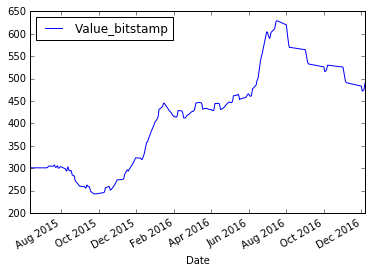

In [82]:
%matplotlib inline
Media_mov.plot()

In [40]:
#Obtén el máximo “spread” (diferencia para el mismo día en los diferentes exchanges) del precio de bitcoin

In [41]:
print bitall.head(2)

            Value_bitstamp  Value_bicoin  Value_itbit
Date                                                 
2015-01-08          281.03        281.83       280.25
2015-01-09          226.95        227.16       226.83


In [42]:
stamp_bit = bitall['Value_bitstamp'] - bitall['Value_itbit']
print stamp_bit.head(2)

Date
2015-01-08    0.78
2015-01-09    0.12
dtype: float64


In [43]:
bitall["stamp_bit"]=stamp_bit

print bitall.head(3)

            Value_bitstamp  Value_bicoin  Value_itbit  stamp_bit
Date                                                            
2015-01-08          281.03        281.83       280.25       0.78
2015-01-09          226.95        227.16       226.83       0.12
2015-01-10          238.18        238.97       238.40      -0.22


In [44]:
stamp_coin = bitall['Value_bitstamp'] - bitall['Value_bicoin']
bitall["stamp_coin"]=stamp_coin
coin_it = bitall['Value_bicoin'] - bitall['Value_itbit']
bitall["coin_it"]=coin_it

bitall.head(10)

,Value_bitstamp,Value_bicoin,Value_itbit,stamp_bit,stamp_coin,coin_it
Date,,,,,,
2015-01-08,281.03,281.83,280.25,0.78,-0.80,1.58
2015-01-09,226.95,227.16,226.83,0.12,-0.21,0.33
2015-01-10,238.18,238.97,238.40,-0.22,-0.79,0.57
2015-01-11,324.05,327.22,326.58,-2.53,-3.17,0.64
2015-01-12,360.93,360.40,362.94,-2.01,0.53,-2.54
2015-02-08,281.77,282.70,281.26,0.51,-0.93,1.44
2015-02-09,229.04,229.52,229.13,-0.09,-0.48,0.39
2015-02-10,237.62,237.82,237.67,-0.05,-0.20,0.15
2015-02-11,364.00,364.12,352.83,11.17,-0.12,11.29


In [45]:
# este es el spred máximo entre bitStamp y itbit
stamp_bit_max= bitall["stamp_bit"].abs().max()
print stamp_bit_max

49.5399


In [46]:
# este es el spred máximo entre bitStamp y coinbase
stamp_coin_max= bitall["stamp_coin"].abs().max()
print stamp_coin_max

14.3301


In [47]:
# este es el spred máximo entre coinbase y itbit

coin_it_max= bitall["coin_it"].abs().max()
print coin_it_max

48.24


In [48]:
# y el “spread medio” para todo el periodo.

In [84]:
# este es el spread medio entre bitStamp y itbit
stamp_bit_med= bitall["stamp_bit"].mean()
print stamp_bit_med

-0.31628715847


In [86]:
# este es el spread medio entre bitStamp y coinbase
stamp_coin_med= bitall["stamp_coin"].mean()
print stamp_coin_med

-1.09141803279


In [90]:
# este es el spread medio entre coinbase y itbit
coin_it_med= bitall["coin_it"].mean()
print coin_it_med


0.775130874317


In [52]:
# Crea gráficos que los comparen dos a dos, y que muestren con alguna indicación gráfica

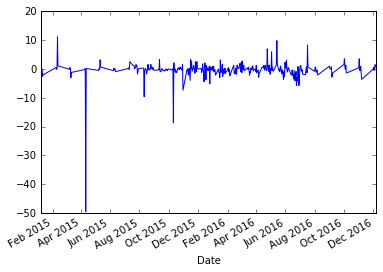

In [53]:
# Gráfica spread entre bitStamp y itbit

%matplotlib inline
stamp_bit.plot()

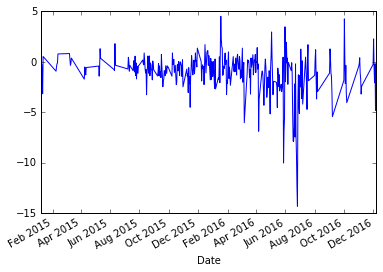

In [54]:
# Gráfica spread entre bitStamp y coinbase

%matplotlib inline
stamp_coin.plot()


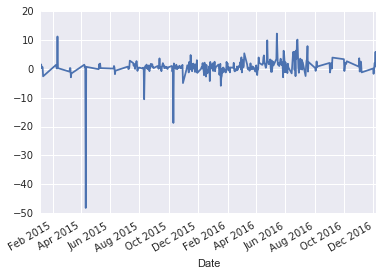

In [104]:
# Gráfica spread entre coinbase y itbit

%matplotlib inline
coin_it.plot()



In [93]:
# que muestren con alguna indicación gráfica (por ejemplo, un punto de otro color) los días de mayor “spread”.

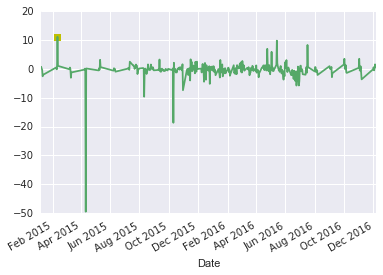

In [116]:
# Gráfica spread entre bitStamp y itbit con resaltador de valores más de spread mayores de 10

%matplotlib inline
spreadmax=bitall.loc[bitall['stamp_bit'] >=10]
line2=plt.plot(spreadmax['stamp_bit'], 's')
plt.setp(line2,color="y",)
stamp_bit.plot()

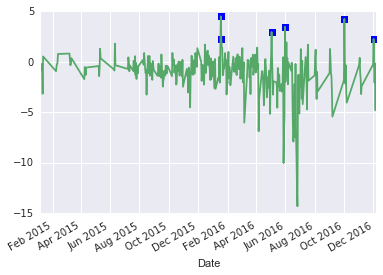

In [115]:
# Gráfica spread entre bitStamp y coinbase con resaltador de valores más de spread mayores de 2


%matplotlib inline
spreadmax=bitall.loc[bitall['stamp_coin'] >=2]
line2=plt.plot(spreadmax['stamp_coin'], 's')
plt.setp(line2,color="b",)
stamp_coin.plot()


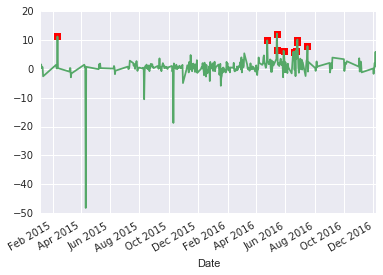

In [117]:
# Gráfica spread entre bitStamp y coinbase con resaltador de valores más de spread mayores de 6

%matplotlib inline
spreadmax=bitall.loc[bitall['coin_it'] >=6]
line2=plt.plot(spreadmax['coin_it'], 's')
plt.setp(line2,color="r",)
coin_it.plot()
